<a href="https://colab.research.google.com/github/alimimam/Morfologi-Citra/blob/main/MUHAMMAD%20ALIM_Erosi%20dan%20Dilasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


In [6]:
img = cv.imread(f'1.jpg', cv.IMREAD_GRAYSCALE)

In [7]:
def dilasi(img, kernel):

    # Dapatkan dimensi citra
    height, width = img.shape

    # Inisialisasi citra hasil dilasi
    dilated_img = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan dilasi
    for i in range(1, height-1):
        for j in range(1, width-1):
            if len(img.shape) == 2:
                region = img[i-1:i+2, j-1:j+2]
            elif len(img.shape) == 3:
                region = img[i-1:i+2, j-1:j+2, :]
            dilated_img[i, j] = np.max(region * kernel)

    return dilated_img

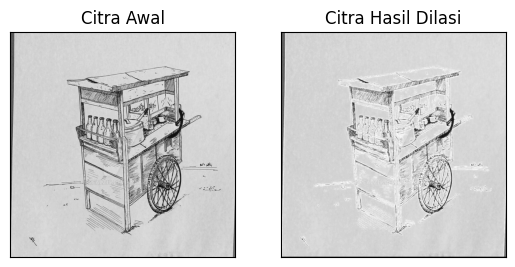

In [8]:
# Buat SED cross 3x3
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

dilated_img = dilasi(img, kernel)

plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilated_img, cmap='gray'),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

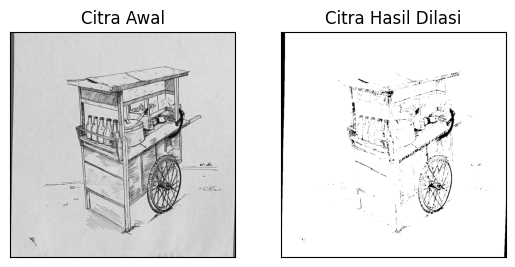

In [9]:
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

dilated_img = cv.dilate(thresh, kernel, iterations = 1)

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilated_img, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()